In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from cliffs_delta import cliffs_delta

In [3]:
# Read participant csv file
df_participant = pd.read_csv('participant_data.csv')

# Read eyetrack data
df_eyetrack = pd.read_csv('eyetrack_data.tsv', sep='\t', header=0)

# Remove the columns that are not needed
df_eyetrack = df_eyetrack.drop(columns=['Recording', 'Gender', 'Timeline', 'TOI', 'Interval'])

# Delete all rows for participant "Test Participant"
df_eyetrack = df_eyetrack[df_eyetrack['Participant'] != 'Test Participant']

In [4]:
# Divide df_participant into two dataframes based on the Base Language column
df_participant_java = df_participant[df_participant['Base Language'] == 'Java']

df_participant_python = df_participant[df_participant['Base Language'] == 'Python']

In [5]:
# Further divisions

# Select only the partipants with the following base grade range
#grade_range = [3, 4]
#df_participant_java = df_participant_java[df_participant_java['Base Grade'].between(grade_range[0], grade_range[1])]
#df_participant_python = df_participant_python[df_participant_python['Base Grade'].between(grade_range[0], grade_range[1])]

# Select only the partipants with "Python Freq" = 1 (who do not have Python as their background)
df_participant_java = df_participant_java[df_participant_java['Python Freq'] <= 1]

<Axes: >

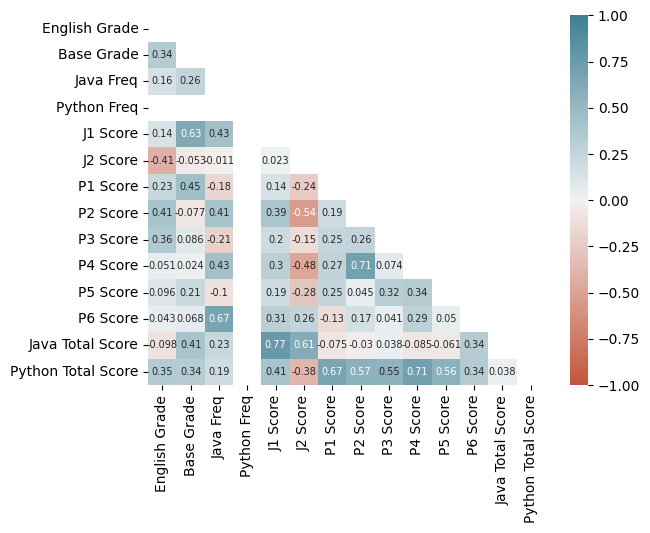

In [6]:
# Add total score column for each participant
df_participant_java['Java Total Score'] = df_participant_java['J1 Score'] + df_participant_java['J2 Score']
df_participant_java['Python Total Score'] = df_participant_java['P1 Score'] + df_participant_java['P2 Score'] + df_participant_java['P3 Score'] + df_participant_java['P4 Score'] + df_participant_java['P5 Score'] + df_participant_java['P6 Score'] 

# Compute Spearman correlation coefficients as we are dealing non-normal data 
corrmat = df_participant_java.corr(numeric_only=True, method='spearman')
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

<Axes: >

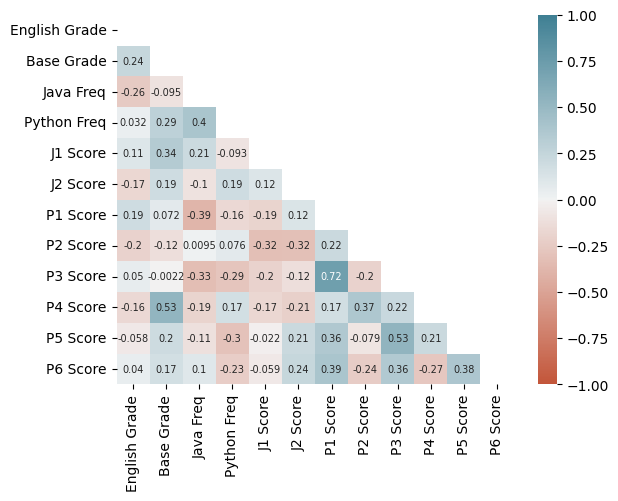

In [7]:
corrmat = df_participant_python.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

The correlation coefficient, p-value and standard error for the graph of Java Test Scores are:
Java Students: 0.55771170029303 0.030753729506317416 0.15719563192086086
Python Students: 0.34255903067014154 0.23055086101197478 0.2585269844901899
The correlation coefficient, p-value and standard error for the graph of Python Syntax Scores are:
Java Students: 0.2754238863913633 0.32043549569661556 0.31492066971167504
Python Students: -0.019379068735406502 0.947573075824164 0.3498401247895442
The correlation coefficient, p-value and standard error for the graph of Python Semantics Scores are:
Java Students: 0.12941869509576417 0.6457360726548573 0.2923117942764981
Python Students: 0.3529329739398334 0.21580862453338726 0.2496279213819
The correlation coefficient, p-value and standard error for the graph of Python Comprehension Scores are:
Java Students: 0.1842743072590631 0.5108963822254734 0.1894230464632338
Python Students: 0.22259446802648192 0.44433441325594025 0.2321883966948007


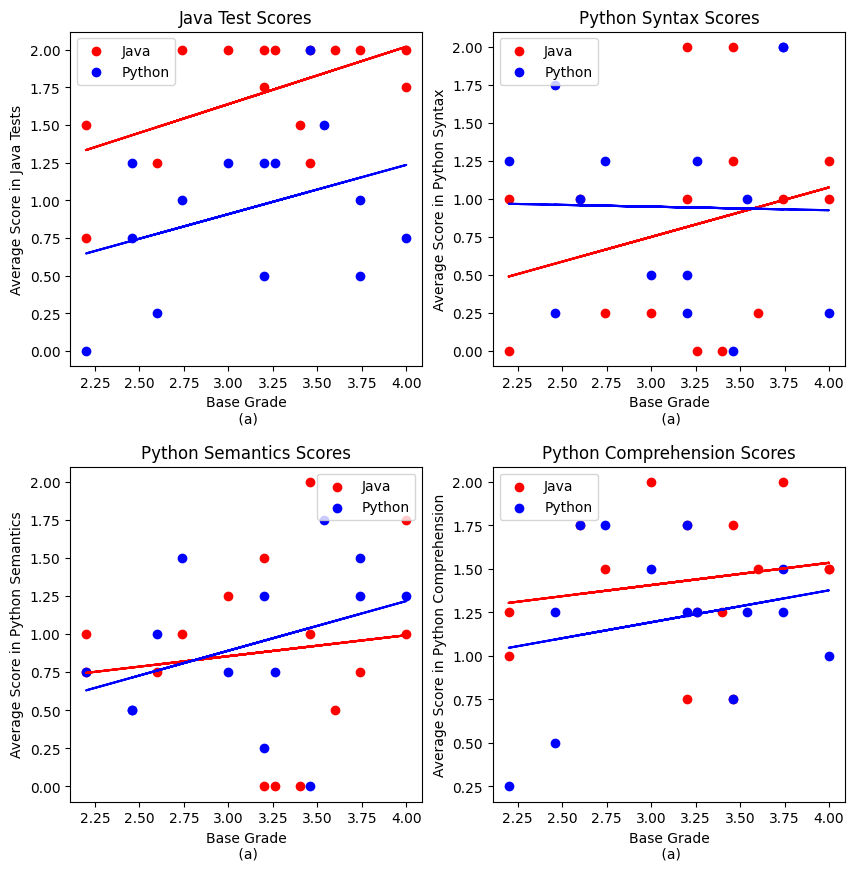

In [ ]:
# Plotting graphs for Java/Python participant grades vs their scores
x1 = df_participant_java["Base Grade"]
x2 = df_participant_python["Base Grade"]

# Parameter variables prefixed with j_ indicate Java participant data and p_ indicate Python participant data

scores = ['J1 Score', 'J2 Score']
j_avg_jscores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_jscores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P1 Score', 'P2 Score']
j_avg_psyn_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psyn_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P3 Score', 'P4 Score']
j_avg_psem_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psem_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P5 Score', 'P6 Score']
j_avg_pcomp_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_pcomp_scores = df_participant_python.loc[:, scores].mean(axis = 1)

# Create 4 subplots of scatter graphs
plot_rows = 2
plot_cols = 2
fig, axs = plt.subplots(plot_rows, plot_cols, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)

subplot_params = [
    [j_avg_jscores, p_avg_jscores,'Java Test Scores', 'Average Score in Java Tests'],
    [j_avg_psyn_scores, p_avg_psyn_scores, 'Python Syntax Scores', 'Average Score in Python Syntax'],
    [j_avg_psem_scores, p_avg_psem_scores, 'Python Semantics Scores', 'Average Score in Python Semantics'],
    [j_avg_pcomp_scores, p_avg_pcomp_scores, 'Python Comprehension Scores', 'Average Score in Python Comprehension']
]

lab = ['a', 'b', 'c', 'd']
for i in range(plot_rows):
    for j in range(plot_cols):
        y1 = subplot_params[2*i+j][0]
        y2 = subplot_params[2*i+j][1]
        #m1, b1 = np.polyfit(x1, y1, 1)
        #m2, b2 = np.polyfit(x2, y2, 1)
        m1, b1, r1, p1, std_err1 = stats.linregress(x1, y1)
        m2, b2, r2, p2, std_err2 = stats.linregress(x2, y2)
        axs[i][j].set_title(subplot_params[2*i+j][2])
        axs[i][j].scatter(x1, y1, color='red')
        axs[i][j].scatter(x2, y2, color='blue')
        axs[i][j].plot(x1, m1*x1 + b1, color='red')
        axs[i][j].plot(x2, m2*x2 + b2, color='blue')
        axs[i][j].set_xlabel(f'Base Grade\n ({lab[2*i+j]})')
        axs[i][j].set_ylabel(subplot_params[2*i+j][3])
        axs[i][j].legend(['Java', 'Python'])
        print("The correlation coefficient, p-value and standard error for the graph of", subplot_params[2*i+j][2], "are:")
        print("Java Students:", r1, p1, std_err1)
        print("Python Students:", r2, p2, std_err2)

plt.show()
    



In [9]:
# Compute Two sample t-tests for all the scores
for i in range(4):
    t_test, p_value = stats.ttest_ind(subplot_params[i][0], subplot_params[i][1])
    print(f'{subplot_params[i][2]}: t-test = {t_test}, p-value = {p_value}')

Java Test Scores: t-test = 4.489212433614014, p-value = 0.00012011371304325283
Python Syntax Scores: t-test = -0.5193488825437091, p-value = 0.6077490349818429
Python Semantics Scores: t-test = -0.2164943779519981, p-value = 0.8302298419240484
Python Comprehension Scores: t-test = 1.3814916650675966, p-value = 0.17845401383804738


In [10]:
# Compute Mann-Whitney U-tests for all the scores
for i in range(4):
    # Compute Shapiro-Wilk test to test for non-normality
    #print(f'{subplot_params[i][2]}: Shapiro-Wilk test for Java = {stats.shapiro(subplot_params[i][0])}')
    #print(f'{subplot_params[i][2]}: Shapiro-Wilk test for Python = {stats.shapiro(subplot_params[i][1])}')
    print(f'{subplot_params[i][2]}: U-test = {stats.mannwhitneyu(x=subplot_params[i][0], y=subplot_params[i][1], alternative = "greater")}\n')

Java Test Scores: U-test = MannwhitneyuResult(statistic=np.float64(184.0), pvalue=np.float64(0.0002341312176104256))

Python Syntax Scores: U-test = MannwhitneyuResult(statistic=np.float64(89.0), pvalue=np.float64(0.7679519754528149))

Python Semantics Scores: U-test = MannwhitneyuResult(statistic=np.float64(100.0), pvalue=np.float64(0.5958276611691239))

Python Comprehension Scores: U-test = MannwhitneyuResult(statistic=np.float64(133.5), pvalue=np.float64(0.10622894521669746))



# Eye-Tracking Analysis

In [11]:
# List the metric columns
metrics = ['Total_duration_of_fixations', 
           'Average_duration_of_fixations', 
           'Number_of_fixations', 
           'Time_to_first_fixation', 
           'Duration_of_first_fixation', 
           'Average_pupil_diameter'
           ]

per_aoi_metrics = ['Average_duration_of_fixations', 'Average_pupil_diameter']

# Pivot the data into a 3-level table, make the index the Participant column
df_eyetrack = df_eyetrack.pivot_table(index=['Participant'],
                                      columns=['Media', 'AOI'], 
                                      values= metrics)

# Impute the missing values with the mean of the column
df_eyetrack = df_eyetrack.fillna(df_eyetrack.mean())

# Divide df_eyetrack into two dataframes based on whether the partipant's base language is Java or Python
df_eyetrack_java = df_eyetrack.loc[df_participant_java['Participant']]
df_eyetrack_python = df_eyetrack.loc[df_participant_python['Participant']]

In [12]:
# Prepare eyetracking metrics
metrics = df_eyetrack.columns.levels[0]

# Get the AOIs for each media
aois = df_eyetrack.columns.levels[1]

#to_remove = ['Participant', 'Media', 'AOI']
#metrics = [metric for metric in metrics if metric not in to_remove]

In [13]:
# Java vs. Python for all eyetracking metrics, media, and AOIs
filename = 'java_vs_python_eyetracking.csv'
with open(filename, 'w') as f:
    f.write('Metric,Media,AOI,Java Avg, Python Avg, Java Median, Python Median, U-statistic,p-value, cliff_delta\n')

# For each metric, media, and AOI, compare between Java and Python participants
for metric in metrics:
    for media in df_eyetrack[metric].columns.levels[0]:
        for aoi in df_eyetrack[metric][media].columns:
            j_metric = df_eyetrack_java[metric][media][aoi]
            j_metric_avg = j_metric.mean()
            j_metric_median = j_metric.median()
            p_metric = df_eyetrack_python[metric][media][aoi]
            p_metric_avg = p_metric.mean()
            p_metric_median = p_metric.median()
            mwtest = stats.mannwhitneyu(x=j_metric, y=p_metric, alternative = "greater")

            # Compute Cliff's delta (effect size)
            cliff = cliffs_delta(j_metric, p_metric)

            #print(f'{metric} for {media} and {aoi}: U-test = {mwtest}\n')
            
            # Save Mann-Whitney U-test and cliff's delta results to a csv file
            with open(filename, 'a') as f:
                f.write(f'{metric},{media},{aoi},{j_metric_avg}, {p_metric_avg}, {j_metric_median}, {p_metric_median}, {mwtest[0]},{mwtest[1]}, {cliff[0]}\n')

        #print('\n')

In [14]:
# Java vs. Python for Comprehension tasks
filename = "java_vs_python_comprehension.csv"
with open(filename, 'w') as f:
    f.write('Metric,Java Avg, Python Avg, Java Median, Python Median, U-statistic,p-value, cliff_delta\n')

comp_media = ['pycomp1', 'pycomp2']

# For each metric, media, and AOI, compare between Java and Python participants
for metric in metrics:
    j_sum = 0
    p_sum = 0
    num_comp_aoi = 0
    for media in comp_media:
        j_sum += df_eyetrack_java[metric][media].sum(axis=1)
        p_sum += df_eyetrack_python[metric][media].sum(axis=1)
        num_comp_aoi += len(df_eyetrack[metric][media].columns)
 
    # Per-AOI metrics
    if metric in per_aoi_metrics:
        j_metric = j_sum / num_comp_aoi
        p_metric = p_sum / num_comp_aoi
    else:
        # Per-code metrics
        j_metric = j_sum / len(comp_media)
        p_metric = p_sum / len(comp_media)

    j_metric_avg = j_metric.mean()
    p_metric_avg = p_metric.mean()

    j_metric_median = j_metric.median()
    p_metric_median = p_metric.median()

    mwtest = stats.mannwhitneyu(x=j_metric, y=p_metric, alternative = "greater")

    # Compute Cliff's delta (effect size)
    cliff = cliffs_delta(j_metric, p_metric)
            
    # Save Mann-Whitney U-test and cliff's delta results to a csv file
    with open(filename, 'a') as f:
        f.write(f'{metric},{j_metric_avg}, {p_metric_avg}, {j_metric_median}, {p_metric_median}, {mwtest[0]},{mwtest[1]}, {cliff[0]}\n')

In [15]:
# Java vs. Python for Debugging tasks
filename = "java_vs_python_debugging.csv"
with open(filename, 'w') as f:
    f.write('Metric,Java Avg, Python Avg, Java Median, Python Median, U-statistic,p-value, cliff_delta\n')

debug_media = ['py1syn', 'py2syn', 'py1sem', 'py2sem']

# For each metric, media, and AOI, compare between Java and Python participants
for metric in metrics:
    j_sum = 0
    num_debug_aoi = 0
    p_sum = 0
    for media in debug_media:
        j_sum += df_eyetrack_java[metric][media].sum(axis=1)
        p_sum += df_eyetrack_python[metric][media].sum(axis=1)
        num_debug_aoi += len(df_eyetrack[metric][media].columns)
    
    # Per AOI metrics
    if metric in per_aoi_metrics:
        j_metric = j_sum / num_debug_aoi
        p_metric = p_sum / num_debug_aoi
    else:
        # Per-code metrics
        j_metric = j_sum / len(debug_media)
        p_metric = p_sum / len(debug_media)

    j_metric_avg = j_metric.mean()
    p_metric_avg = p_metric.mean()

    j_metric_median = j_metric.median()
    p_metric_median = p_metric.median()

    mwtest = stats.mannwhitneyu(x=j_metric, y=p_metric, alternative = "greater")

    # Compute Cliff's delta (effect size)
    cliff = cliffs_delta(j_metric, p_metric)
            
    # Save Mann-Whitney U-test and cliff's delta results to a csv file
    with open(filename, 'a') as f:
        f.write(f'{metric},{j_metric_avg}, {p_metric_avg}, {j_metric_median}, {p_metric_median}, {mwtest[0]},{mwtest[1]}, {cliff[0]}\n')

In [16]:
# Comprehension vs Debugging tasks for all participants

filename = "comp_vs_debug_eyetracking.csv"
with open(filename, 'w') as f:
    f.write('Metric,Comp Avg, Debug Avg, Comp Median, Debug Median, W-statistic,p-value, cliff_delta\n')

comp_media = ['pycomp1', 'pycomp2']
debug_media = ['py1syn', 'py2syn', 'py1sem', 'py2sem']

# Create a new data frame summing up the values for each media
for metric in metrics:
    comp_sum = 0
    num_comp_aoi = 0
    debug_sum = 0
    num_debug_aoi = 0
    for media in comp_media:
        comp_sum += df_eyetrack[metric][media].sum(axis=1)
        num_comp_aoi += len(df_eyetrack[metric][media].columns) 
    for media in debug_media:
        debug_sum += df_eyetrack[metric][media].sum(axis=1)
        num_debug_aoi += len(df_eyetrack[metric][media].columns)
 
    # Per AOI metrics
    if metric in per_aoi_metrics:
        comp_metric = comp_sum / num_comp_aoi
        debug_metric = debug_sum / num_debug_aoi
    else:
        # Per-code metrics
        comp_metric = comp_sum / len(comp_media)
        debug_metric = debug_sum / len(debug_media)
    
    comp_metric_avg = comp_metric.mean()
    debug_metric_avg = debug_metric.mean()    
    comp_metric_median = comp_metric.median()
    debug_metric_median = debug_metric.median()    

    wtest = stats.wilcoxon(x=debug_metric, y=comp_metric, alternative = "greater")

    # Compute Cliff's delta (effect size)
    cliff = cliffs_delta(debug_metric, comp_metric)

    # Save results to a csv file
    with open(filename, 'a') as f:
        f.write(f'{metric},{comp_metric_avg}, {debug_metric_avg}, {comp_metric_median}, {debug_metric_median}, {wtest[0]},{wtest[1]}, {cliff[0]}\n')


In [17]:
# Syntax vs Semantic Debugging
filename = 'syn_vs_sem_eyetracking.csv'
with open(filename, 'w') as f:
    f.write('Metric,AOI,Syn Avg, Sem Avg, Syn Median, Sem Median, W-statistic,p-value, cliff_delta\n')

# For each of the eye-track metrics, compare between pysyn and pysem for all participants
for metric in metrics:
    py1syn = df_eyetrack[metric]['py1syn']['BugIsHere']
    py2syn = df_eyetrack[metric]['py2syn']['BugIsHere']
    pysyn = (py1syn + py2syn) / 2
    pysyn_avg = pysyn.mean()
    pysyn_median = pysyn.median()
    py1sem = df_eyetrack[metric]['py1sem']['BugIsHere']
    py2sem = df_eyetrack[metric]['py2sem']['BugIsHere']

    pysem = (py1sem + py2sem) / 2
    pysem_avg = pysem.mean()
    pysem_median = pysem.median()
    #t_test, p_value = stats.ttest_ind(pysyn, pysem, nan_policy='omit')
    #print(f'{metric}: t-test = {t_test}, p-value = {p_value}, avg pysyn = {pysyn_avg}, avg pysem = {pysem_avg}')
    
    # Perform Shapiro-Wilk test to test for non-normality
    #print(f'{metric}: Shapiro-Wilk test for pysyn = {stats.shapiro(pysyn.dropna())}')
    #print(f'{metric}: Shapiro-Wilk test for pysem = {stats.shapiro(pysem.dropna())}')

    # Perform Wilcoxon signed-rank test (since we're running them on the same participants but different conditions)
    wtest = stats.wilcoxon(x=pysyn, y=pysem, alternative = "greater")

    # Compute Cliff's delta (effect size)
    cliff = cliffs_delta(pysyn, pysem)

    # Add to file
    with open(filename, 'a') as f:
        f.write(f'{metric},BugIsHere,{pysyn_avg}, {pysem_avg}, {pysyn_median}, {pysem_median}, {wtest[0]},{wtest[1]}, {cliff[0]}\n')

    #print(f'{metric}: W-test = {stats.wilcoxon(x=pysyn, y=pysem, alternative = "greater")}\n')